In [2]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn


## Importing libraries

In [11]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

# Time series analysis
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Machine learning algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Data Loading

In [16]:

# Read the GMSL data
sealevel_df = pd.read_csv('sealevel.csv')

# Read the temperature anomalies data
temp_df = pd.read_csv('GLB.Ts+dSST.csv', na_values='***')



## Data Cleaning and Preprocessing

In [17]:
# Display the first few rows
gmsl_df.head()


,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [18]:
# Check the first few rows
temp_df.head()




,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.09,-0.15,-0.22,-0.22,-0.18,-0.17,NaN,NaN,-0.11,-0.17,-0.20
1,1881,-0.19,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.18,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.05,-0.15,-0.13,-0.22,-0.16,-0.07,-0.14,-0.23,-0.17,-0.36,-0.11,-0.08,0.08,-0.08,-0.15,-0.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.17,-0.20,-0.34,-0.16,-0.09,-0.19
4,1884,-0.12,-0.08,-0.36,-0.40,-0.33,-0.35,-0.30,-0.28,-0.27,-0.25,-0.33,-0.30,-0.28,-0.27,-0.10,-0.36,-0.31,-0.28


## Handling Missing Values and Data Types

In [19]:
# Convert 'Year' to datetime
sealevel_df['Year'] = pd.to_datetime(sealevel_df['Year'], format='%Y')

# Check for missing values
sealevel_df.isnull().sum()



Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64

In [20]:
# Convert 'Year' to datetime
temp_df['Year'] = pd.to_datetime(temp_df['Year'], format='%Y')

# Replace '***' with NaN and convert columns to numeric
cols = temp_df.columns.drop('Year')
temp_df[cols] = temp_df[cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'J-D' values
temp_df = temp_df.dropna(subset=['J-D'])




## Merging the Datasets


In [21]:
# Select necessary columns
gmsl_data = sealevel_df[['Year', 'GMSL_noGIA']].copy()
temp_data = temp_df[['Year', 'J-D']].copy()

# Rename columns
gmsl_data.rename(columns={'GMSL_noGIA': 'GMSL'}, inplace=True)
temp_data.rename(columns={'J-D': 'TempAnomaly'}, inplace=True)

# Merge datasets on 'Year'
merged_df = pd.merge(gmsl_data, temp_data, on='Year')

# Reset index
merged_df.reset_index(drop=True, inplace=True)

# Display merged data
merged_df.head()


,Year,GMSL,TempAnomaly
0,1993-01-01,-38.59,0.23
1,1993-01-01,-41.97,0.23
2,1993-01-01,-41.93,0.23
3,1993-01-01,-42.67,0.23
4,1993-01-01,-37.86,0.23


## Data Visualization
Plotting GMSL and Temperature Anomalies Over Time

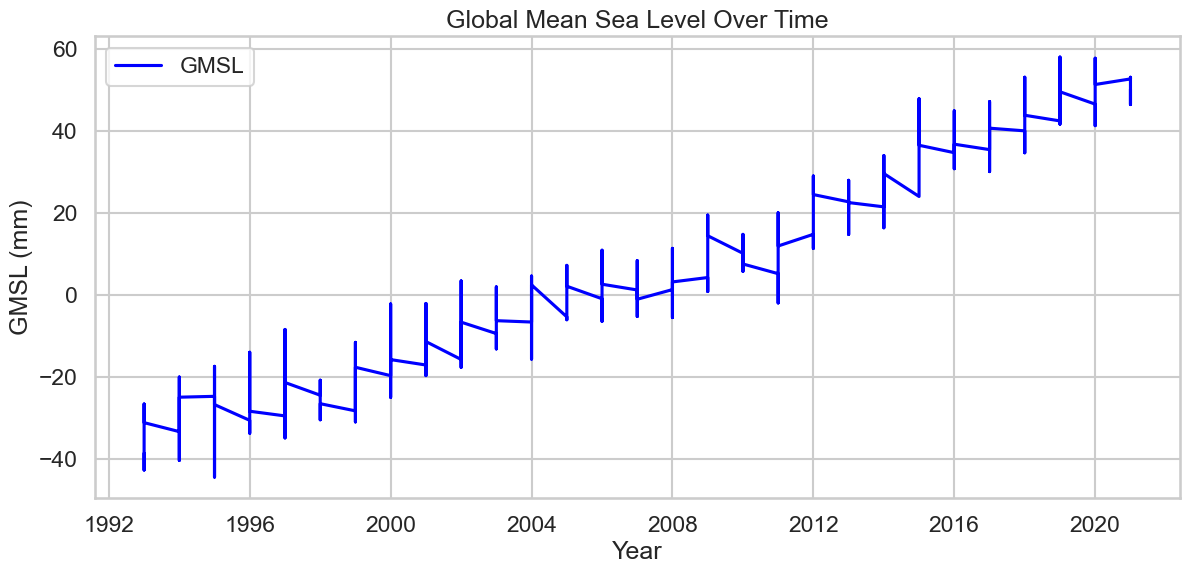

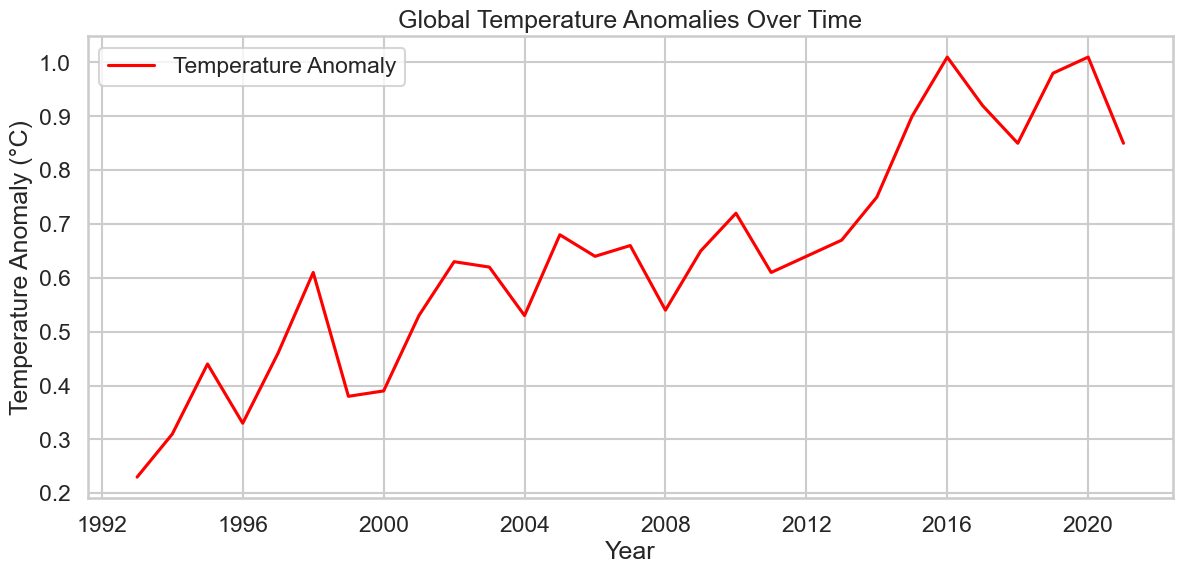

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(merged_df['Year'], merged_df['GMSL'], label='GMSL', color='blue')
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('Global Mean Sea Level Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(merged_df['Year'], merged_df['TempAnomaly'], label='Temperature Anomaly', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies Over Time')
plt.legend()
plt.show()


## Scatter Plot of GMSL vs. Temperature Anomaly

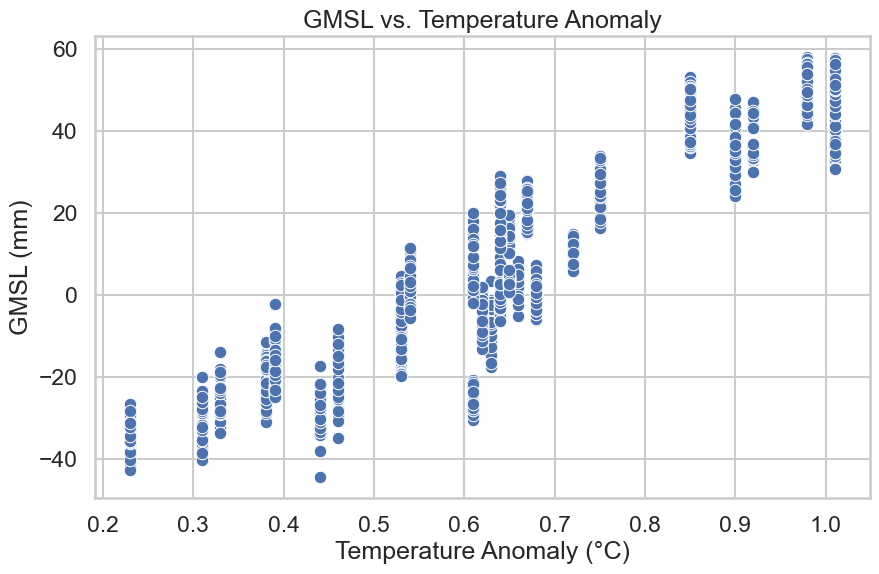

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TempAnomaly', y='GMSL', data=merged_df)
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('GMSL (mm)')
plt.title('GMSL vs. Temperature Anomaly')
plt.show()


# Advanced Modeling Techniques
##  Polynomial Regression
Rationale
Linear regression may not capture nonlinear relationships. Polynomial regression allows us to model such relationships by introducing polynomial terms.

In [24]:
 # Prepare the data
X = merged_df[['TempAnomaly']]
y = merged_df['GMSL']

# Create polynomial features
poly_degree = 2  # You can experiment with different degrees
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, shuffle=False)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={poly_degree}) MSE: {mse_poly:.2f}")
print(f"Polynomial Regression (degree={poly_degree}) R-squared: {r2_poly:.2f}")


Polynomial Regression (degree=2) MSE: 141.90
Polynomial Regression (degree=2) R-squared: -2.03


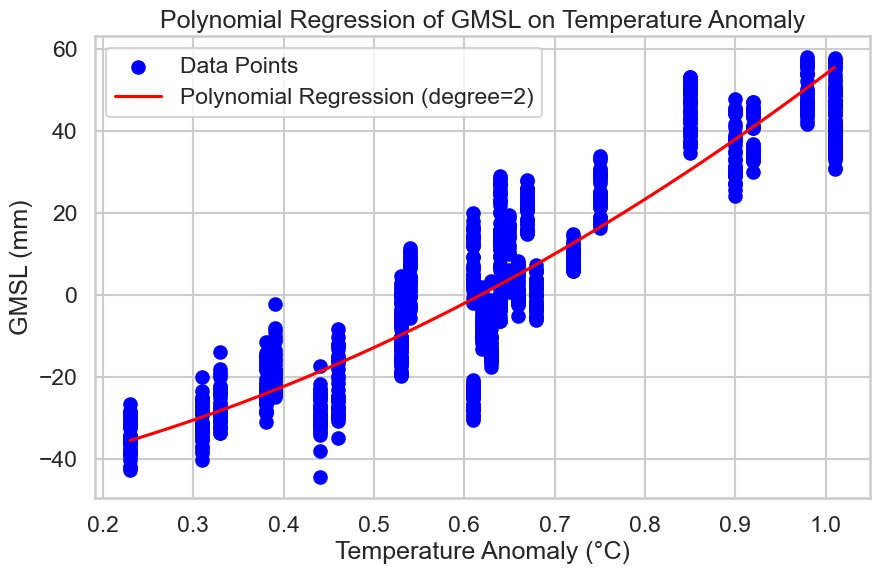

In [25]:
# Plotting the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X['TempAnomaly'], y, color='blue', label='Data Points')
X_seq = np.linspace(X['TempAnomaly'].min(), X['TempAnomaly'].max(), 300).reshape(-1, 1)
X_seq_poly = poly_features.transform(X_seq)
y_seq_pred = poly_model.predict(X_seq_poly)
plt.plot(X_seq, y_seq_pred, color='red', label=f'Polynomial Regression (degree={poly_degree})')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('GMSL (mm)')
plt.title('Polynomial Regression of GMSL on Temperature Anomaly')
plt.legend()
plt.show()


## Time Series Analysis with ARIMA
Rationale
Time series models like ARIMA can capture temporal dependencies and trends in the data.

In [26]:
# Set 'Year' as index
merged_df_ts = merged_df.set_index('Year')

# Fit ARIMA model (order can be optimized)
arima_order = (1, 1, 1)
arima_model = ARIMA(merged_df_ts['GMSL'], order=arima_order)
arima_result = arima_model.fit()

print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                   GMSL   No. Observations:                 1048
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2497.011
Date:                Wed, 02 Oct 2024   AIC                           5000.021
Time:                        23:51:30   BIC                           5014.882
Sample:                             0   HQIC                          5005.657
                               - 1048                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1444      0.087      1.668      0.095      -0.025       0.314
ma.L1         -0.4153      0.086     -4.813      0.000      -0.584      -0.246
sigma2         6.9025      0.192     35.978      0.0

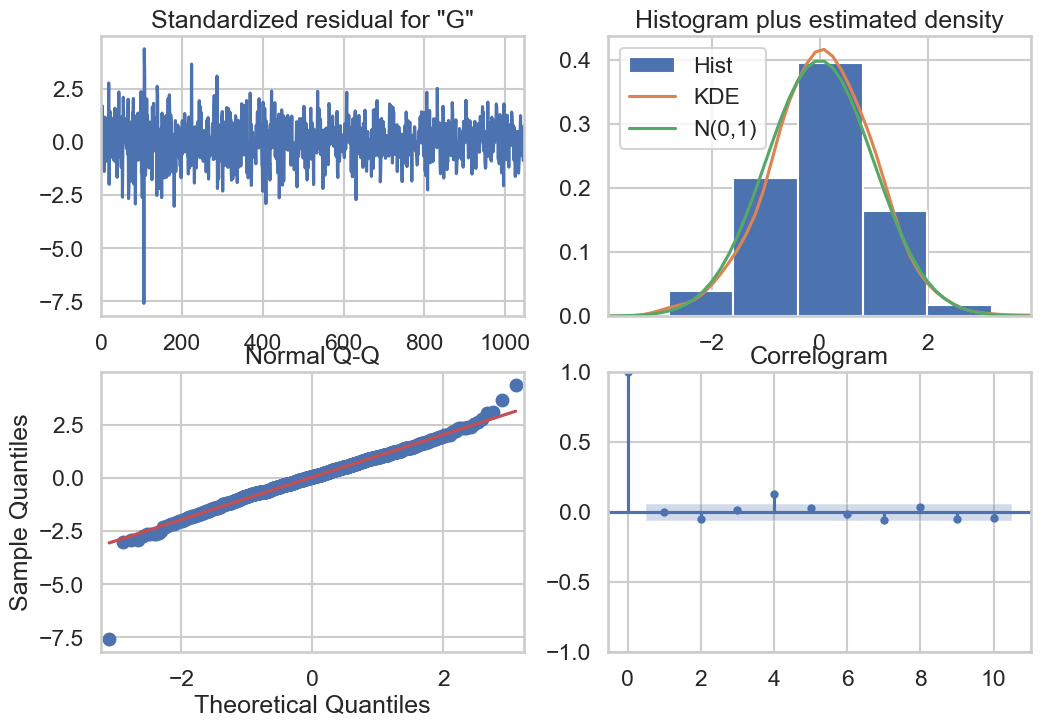

In [27]:
# Residual diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


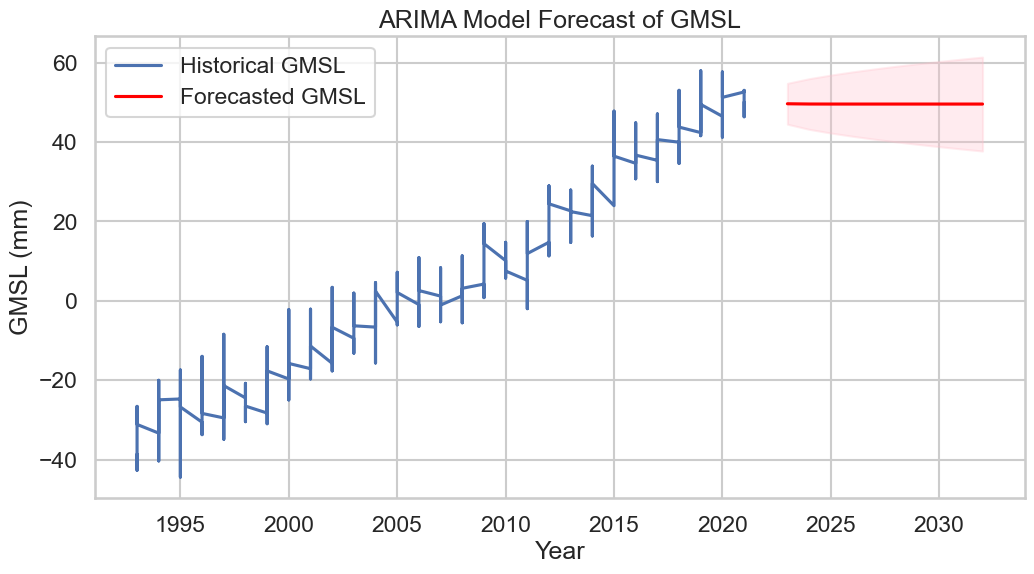

In [28]:
# Forecasting future GMSL
forecast_steps = 10  # Forecasting 10 periods ahead
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=merged_df_ts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(merged_df_ts.index, merged_df_ts['GMSL'], label='Historical GMSL')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted GMSL', color='red')
plt.fill_between(forecast_index, forecast.conf_int()['lower GMSL'], forecast.conf_int()['upper GMSL'], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('ARIMA Model Forecast of GMSL')
plt.legend()
plt.show()


## More Machine Learning Models
We will explore Random Forest Regressor and Support Vector Regressor.

Data Preparation

In [29]:
# Features and target
X_ml = merged_df[['TempAnomaly']]
y_ml = merged_df['GMSL']

# Split the data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, shuffle=False)


Random Forest Regressor

In [30]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_ml, y_train_ml)

# Predict
y_pred_rf = rf_model.predict(X_test_ml)

# Evaluate the model
mse_rf = mean_squared_error(y_test_ml, y_pred_rf)
r2_rf = r2_score(y_test_ml, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Random Forest MSE: 157.96
Random Forest R-squared: -2.38


Support Vector Regressor

In [31]:
# Initialize the model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model
svr_model.fit(X_train_ml, y_train_ml)

# Predict
y_pred_svr = svr_model.predict(X_test_ml)

# Evaluate the model
mse_svr = mean_squared_error(y_test_ml, y_pred_svr)
r2_svr = r2_score(y_test_ml, y_pred_svr)

print(f"Support Vector Regressor MSE: {mse_svr:.2f}")
print(f"Support Vector Regressor R-squared: {r2_svr:.2f}")


Support Vector Regressor MSE: 193.77
Support Vector Regressor R-squared: -3.14


Hyperparameter Tuning with GridSearchCV (Optional)

In [32]:
# Parameters for tuning
param_grid = {
    'C': [1e0, 1e1, 1e2],
    'gamma': np.logspace(-2, 2, 5),
    'epsilon': [0.1, 0.2, 0.5]
}

# Grid search
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_ml, y_train_ml)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predict with best estimator
y_pred_svr_best = grid_search.best_estimator_.predict(X_test_ml)

# Evaluate the model
mse_svr_best = mean_squared_error(y_test_ml, y_pred_svr_best)
r2_svr_best = r2_score(y_test_ml, y_pred_svr_best)

print(f"Tuned Support Vector Regressor MSE: {mse_svr_best:.2f}")
print(f"Tuned Support Vector Regressor R-squared: {r2_svr_best:.2f}")


Best parameters: {'C': 100.0, 'epsilon': 0.5, 'gamma': 0.1}
Tuned Support Vector Regressor MSE: 193.33
Tuned Support Vector Regressor R-squared: -3.13


##  Model Comparison

In [33]:
# Compile results
results = pd.DataFrame({
    'Model': ['Linear Regression', f'Polynomial Regression (degree={poly_degree})', 'Random Forest', 'Support Vector Regressor', 'Tuned SVR'],
    'MSE': [mean_squared_error(y_test, LinearRegression().fit(X_train, y_train).predict(X_test)),
            mse_poly,
            mse_rf,
            mse_svr,
            mse_svr_best],
    'R-squared': [r2_score(y_test, LinearRegression().fit(X_train, y_train).predict(X_test)),
                  r2_poly,
                  r2_rf,
                  r2_svr,
                  r2_svr_best]
})

results


,Model,MSE,R-squared
0,Linear Regression,141.901144,-2.033441
1,Polynomial Regression (degree=2),141.901144,-2.033441
2,Random Forest,157.962406,-2.376785
3,Support Vector Regressor,193.766778,-3.142180
4,Tuned SVR,193.330408,-3.132852


## Neural Network Modeling
### Data Preparation
Feature Scaling
Neural networks perform better when input features are scaled.



In [39]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.9 MB/s eta 0:00:00


In [40]:
# import
# PyTorch for neural networks
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [41]:
# Features and target
X = merged_df[['TempAnomaly']].values
y = merged_df['GMSL'].values

# Split the data into training and testing sets (we'll keep the temporal order)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))


In [42]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)



## Building the neural network

In [43]:
# Define the neural network model
class SeaLevelModel(nn.Module):
    def __init__(self):
        super(SeaLevelModel, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.output_layer(out)
        return out

# Instantiate the model
model = SeaLevelModel()


##  Training the Model
### Define Loss Function and Optimizer

In [45]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


### Training loop

In [46]:
# Number of epochs
num_epochs = 1000

# Lists to store loss values
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Zero gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Record training loss
    train_losses.append(loss.item())
    
    # Evaluate on test data
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.6f}, Validation Loss: {test_loss.item():.6f}')


Epoch [100/1000], Training Loss: 0.012469, Validation Loss: 0.013918
Epoch [200/1000], Training Loss: 0.012283, Validation Loss: 0.013972
Epoch [300/1000], Training Loss: 0.012001, Validation Loss: 0.014026
Epoch [400/1000], Training Loss: 0.011600, Validation Loss: 0.014076
Epoch [500/1000], Training Loss: 0.011067, Validation Loss: 0.014581
Epoch [600/1000], Training Loss: 0.010587, Validation Loss: 0.015081
Epoch [700/1000], Training Loss: 0.010730, Validation Loss: 0.012958
Epoch [800/1000], Training Loss: 0.010167, Validation Loss: 0.013442
Epoch [900/1000], Training Loss: 0.010085, Validation Loss: 0.013474
Epoch [1000/1000], Training Loss: 0.011489, Validation Loss: 0.012054


### Plotting Training and Validation Loss

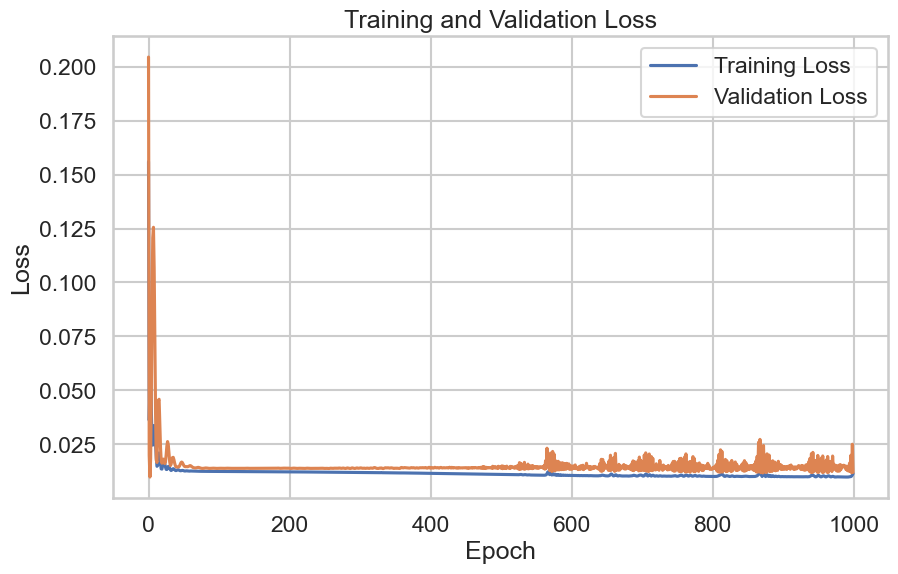

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Evaluating the Model

### Predictions

In [48]:
# Set the model to evaluation mode
model.eval()

# Predict on test data
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor)

# Convert predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.numpy())
y_test_actual = scaler_y.inverse_transform(y_test_tensor.numpy())


### Model Performance Metrics

In [49]:
# Calculate MSE and R-squared
mse_nn = mean_squared_error(y_test_actual, y_pred)
r2_nn = r2_score(y_test_actual, y_pred)

print(f"Neural Network MSE: {mse_nn:.2f}")
print(f"Neural Network R-squared: {r2_nn:.2f}")


Neural Network MSE: 96.99
Neural Network R-squared: -1.07


### Plotting Prediction VS actual values

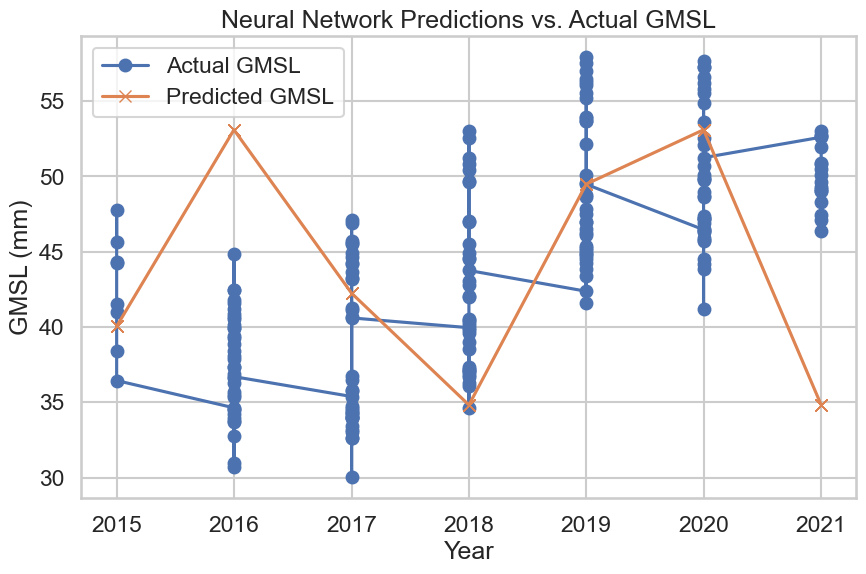

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'][train_size:], y_test_actual.flatten(), label='Actual GMSL', marker='o')
plt.plot(merged_df['Year'][train_size:], y_pred.flatten(), label='Predicted GMSL', marker='x')
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('Neural Network Predictions vs. Actual GMSL')
plt.legend()
plt.show()


# Hyperparameter Tuning
We can improve the model by adjusting the learning rate, number of epochs, network architecture, etc.

### Adjusting the model architecture

In [51]:
# Define a more complex neural network model
class SeaLevelModelTuned(nn.Module):
    def __init__(self):
        super(SeaLevelModelTuned, self).__init__()
        self.layer1 = nn.Linear(1, 128)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.layer3(out)
        out = self.relu3(out)
        out = self.output_layer(out)
        return out

# Instantiate the tuned model
model_tuned = SeaLevelModelTuned()


### Retraining with adjusted Parameters

In [52]:
# Loss function and optimizer with a lower learning rate
criterion_tuned = nn.MSELoss()
optimizer_tuned = torch.optim.Adam(model_tuned.parameters(), lr=0.005)

# Number of epochs
num_epochs_tuned = 2000

# Lists to store loss values
train_losses_tuned = []
test_losses_tuned = []

for epoch in range(num_epochs_tuned):
    # Zero gradients
    optimizer_tuned.zero_grad()
    
    # Forward pass
    outputs_tuned = model_tuned(X_train_tensor)
    loss_tuned = criterion_tuned(outputs_tuned, y_train_tensor)
    
    # Backward pass and optimization
    loss_tuned.backward()
    optimizer_tuned.step()
    
    # Record training loss
    train_losses_tuned.append(loss_tuned.item())
    
    # Evaluate on test data
    with torch.no_grad():
        test_outputs_tuned = model_tuned(X_test_tensor)
        test_loss_tuned = criterion_tuned(test_outputs_tuned, y_test_tensor)
        test_losses_tuned.append(test_loss_tuned.item())
    
    # Print loss every 200 epochs
    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_tuned}], Training Loss: {loss_tuned.item():.6f}, Validation Loss: {test_loss_tuned.item():.6f}')


Epoch [200/2000], Training Loss: 0.012593, Validation Loss: 0.013674
Epoch [400/2000], Training Loss: 0.012113, Validation Loss: 0.013744
Epoch [600/2000], Training Loss: 0.011054, Validation Loss: 0.014555
Epoch [800/2000], Training Loss: 0.010643, Validation Loss: 0.015917
Epoch [1000/2000], Training Loss: 0.010322, Validation Loss: 0.015158
Epoch [1200/2000], Training Loss: 0.010386, Validation Loss: 0.012891
Epoch [1400/2000], Training Loss: 0.010154, Validation Loss: 0.013088
Epoch [1600/2000], Training Loss: 0.009976, Validation Loss: 0.015062
Epoch [1800/2000], Training Loss: 0.009915, Validation Loss: 0.014073
Epoch [2000/2000], Training Loss: 0.009897, Validation Loss: 0.016328


### Evaluating the tuned model

In [53]:
# Predict on test data
with torch.no_grad():
    y_pred_tuned_scaled = model_tuned(X_test_tensor)

# Convert predictions back to original scale
y_pred_tuned = scaler_y.inverse_transform(y_pred_tuned_scaled.numpy())

# Calculate MSE and R-squared
mse_nn_tuned = mean_squared_error(y_test_actual, y_pred_tuned)
r2_nn_tuned = r2_score(y_test_actual, y_pred_tuned)

print(f"Tuned Neural Network MSE: {mse_nn_tuned:.2f}")
print(f"Tuned Neural Network R-squared: {r2_nn_tuned:.2f}")


Tuned Neural Network MSE: 131.37
Tuned Neural Network R-squared: -1.81


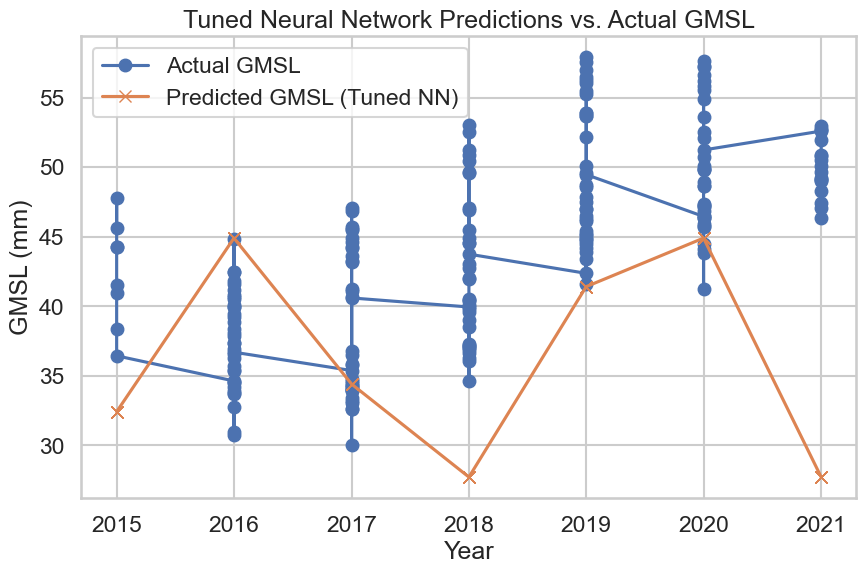

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'][train_size:], y_test_actual.flatten(), label='Actual GMSL', marker='o')
plt.plot(merged_df['Year'][train_size:], y_pred_tuned.flatten(), label='Predicted GMSL (Tuned NN)', marker='x')
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('Tuned Neural Network Predictions vs. Actual GMSL')
plt.legend()
plt.show()


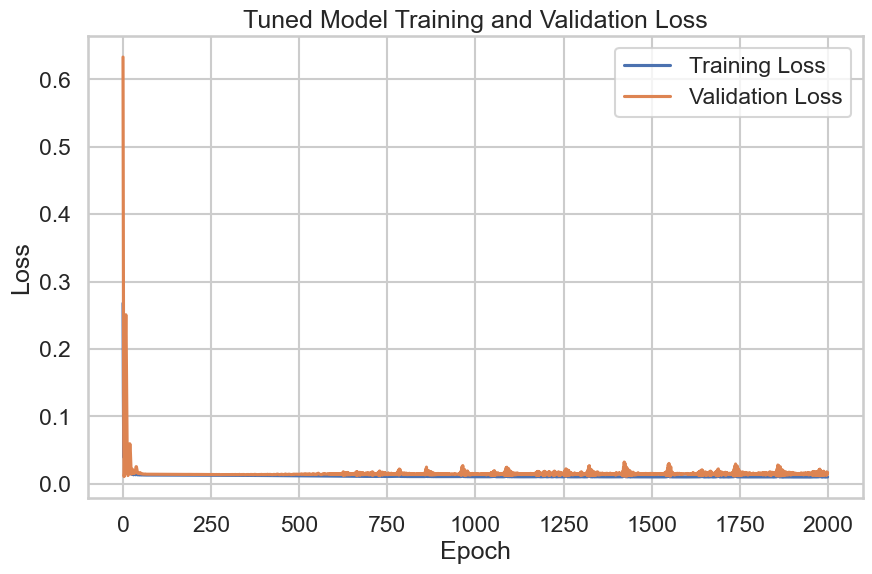

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_tuned, label='Training Loss')
plt.plot(test_losses_tuned, label='Validation Loss')
plt.title('Tuned Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Compile Results

In [56]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Polynomial Regression (degree=2)
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Compile results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree=2)', 'Neural Network', 'Tuned Neural Network'],
    'MSE': [mse_linear, mse_poly, mse_nn, mse_nn_tuned],
    'R-squared': [r2_linear, r2_poly, r2_nn, r2_nn_tuned]
})

results


,Model,MSE,R-squared
0,Linear Regression,162.403843,-2.471730
1,Polynomial Regression (degree=2),141.901144,-2.033441
2,Neural Network,96.985420,-1.073271
3,Tuned Neural Network,131.373367,-1.808387


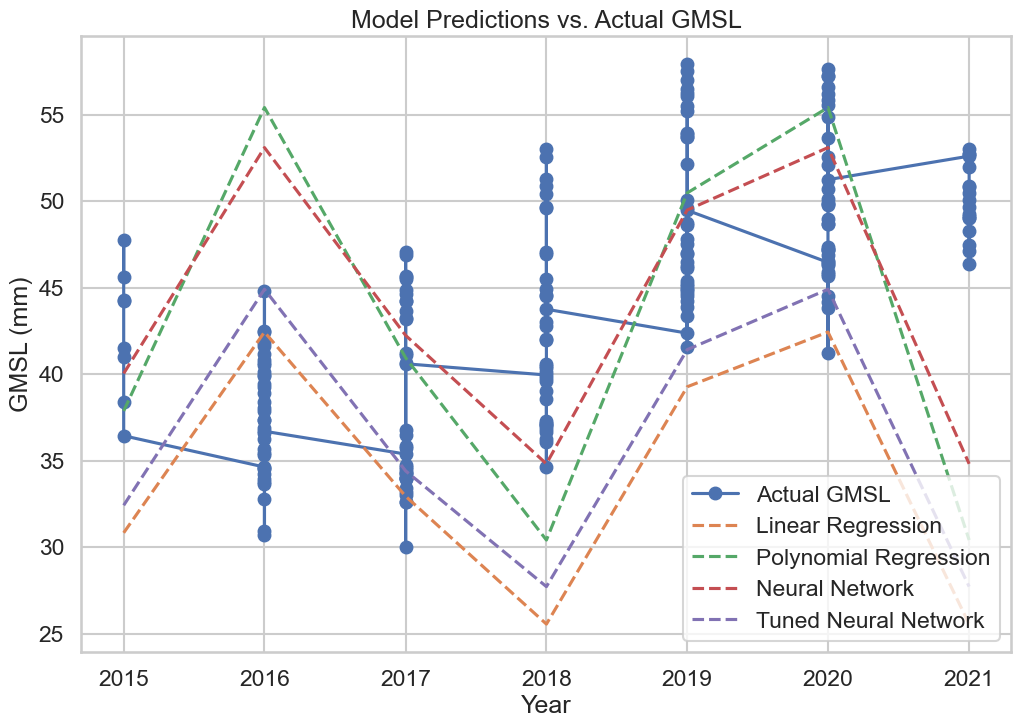

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(merged_df['Year'][train_size:], y_test_actual.flatten(), label='Actual GMSL', marker='o')
plt.plot(merged_df['Year'][train_size:], y_pred_linear, label='Linear Regression', linestyle='--')
plt.plot(merged_df['Year'][train_size:], y_pred_poly, label='Polynomial Regression', linestyle='--')
plt.plot(merged_df['Year'][train_size:], y_pred.flatten(), label='Neural Network', linestyle='--')
plt.plot(merged_df['Year'][train_size:], y_pred_tuned.flatten(), label='Tuned Neural Network', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('Model Predictions vs. Actual GMSL')
plt.legend()
plt.show()
